In [8]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from numpy import typing as npt

In [15]:
# Adapted from https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/
class Plotter():

    def __init__(self, vectors, colors):
        self.vectors = vectors
        self.colors = colors
    
    def plot_vectors(
        self,
        vectors: List, 
        colors: List):
        """ Plot a set of vectors.

        Args
        vectors: coordinates of the vectors to plot.
        colors: colors of the vectors.

        Returns:
        The figure representing the vectors' plot.
        """
        if len(vectors) != len(colors):
            raise ValueError('The number of colors should be equal to provided vectors.')
        plt.figure()
        plt.axvline(x=0, color='#A9A9A9', zorder=0)
        plt.axhline(y=0, color='#A9A9A9', zorder=0)

        for idx, vector in enumerate(vectors):
            x = np.concatenate([[0, 0], vector])
            plt.quiver([x[0]],
                    [x[1]],
                    [x[2]],
                    [x[3]],
                    angles='xy',
                    scale_units='xy',
                    scale=1,
                    color=colors[idx])

    def matrixToPlot(self, matrix, vectorsCol=['#FF9A13', '#1190FF']):
        """
        Modify the unit circle and basis vector by applying a matrix.
        Visualize the effect of the matrix in 2D.

        Parameters
        ----------
        matrix : array-like
            2D matrix to apply to the unit circle.
        vectorsCol : HEX color code
            Color of the basis vectors

        Returns:

        fig : instance of matplotlib.figure.Figure
            The figure containing modified unit circle and basis vectors.
        """
        # Unit circle
        x = np.linspace(-1, 1, 100000)
        y = np.sqrt(1-(x**2))

        # Modified unit circle (separate negative and positive parts)
        x1 = matrix[0,0]*x + matrix[0,1]*y
        y1 = matrix[1,0]*x + matrix[1,1]*y
        x1_neg = matrix[0,0]*x - matrix[0,1]*y
        y1_neg = matrix[1,0]*x - matrix[1,1]*y

        # Vectors
        u1 = [matrix[0,0],matrix[1,0]]
        v1 = [matrix[0,1],matrix[1,1]]

        self.plot_vectors([u1, v1], colors=[vectorsCol[0], vectorsCol[1]])

        plt.plot(x1, y1, 'g', alpha=0.5)
        plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

In [16]:
A = np.array([[3, 2], [1, 4]])
U, V, D = np.linalg.svd(A)

Unit circle:


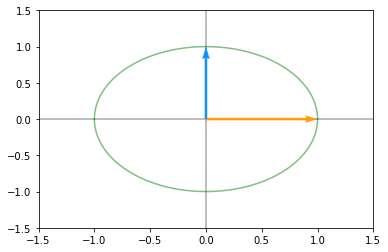

In [18]:
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [19]:
print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

First rotation:


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [25]:
print('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()


Scaling:


IndexError: invalid index to scalar variable.

In [26]:
print('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Second rotation:


IndexError: invalid index to scalar variable.

Unit circle transformed by A:


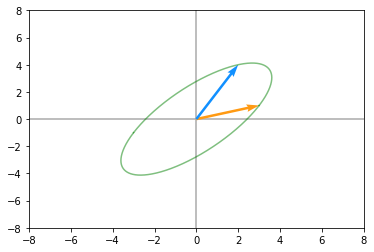

In [20]:
print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()